In [156]:
import shapefile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import twd97
import random

In [4]:
#sf = shapefile.Reader("./Data/三灣_Merge")
#sf = shapefile.Reader("./Data/三灣鄉/103年三灣鄉防治")
#sf = shapefile.Reader("./Data/三灣鄉/104年三灣鄉新增火蟻發生地圖號")
#sf = shapefile.Reader("./Data/頭份鎮/103年與之前的頭份鎮防治")


In [157]:
df = pd.read_csv('./Data/test.csv')

In [158]:
df['LAT'] = df[df.columns[1]]
df['LON'] = df[df.columns[2]]
df['lat'] = df[df.columns[1]]
df['lon'] = df[df.columns[2]]

In [159]:
df.head()

,Tube ID,LAT (Y),LON (X),Date,IS RIFA,LAT,LON,lat,lon
0,24901723,2777271.63,290155.40,2011-08-18,1,2777271.63,290155.40,2777271.63,290155.40
1,24900702,2779891.62,288359.56,2011-11-02,1,2779891.62,288359.56,2779891.62,288359.56
2,24901402,2780855.44,289574.96,2011-10-28,1,2780855.44,289574.96,2780855.44,289574.96
3,24901402A,2780821.30,289552.24,2011-10-28,1,2780821.30,289552.24,2780821.30,289552.24
4,24901402B,2780824.40,289551.25,2011-10-28,1,2780824.40,289551.25,2780824.40,289551.25


In [160]:
twd97.towgs84(290155.40,2777271.63 )

(25.103237710994744, 121.39814582796106)

In [161]:
lats = np.ones(len(df))
lons = np.ones(len(df))

In [162]:
for i in df.index:
    if df.loc[i].LON > 125 and df.loc[i].LAT > 26:
        (lats[i], lons[i]) = twd97.towgs84(df.loc[i].LON, df.loc[i].LAT)
    else:
        (lats[i], lons[i]) = (df.loc[i].LON, df.loc[i].LAT)

In [163]:
df.lat = lats
df.lon = lons

In [176]:
len(df.lon.unique())

9821

In [177]:
len(df.lon)

9840

In [165]:
df.lat.max()

25.16894387159813

In [166]:
df.lat.min()

24.82767806

In [79]:
n = 2

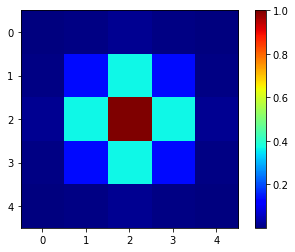

In [80]:
import numpy as np
import matplotlib.pyplot as plt

#3*3 Gassian filter
x, y = np.mgrid[-n:n+1, -n:n+1]
gaussian_kernel = np.exp(-(x**2+y**2))

#Normalization
#gaussian_kernel = gaussian_kernel / gaussian_kernel.sum()

plt.imshow(gaussian_kernel, cmap=plt.get_cmap('jet'), interpolation='nearest')
plt.colorbar()
plt.show()

In [81]:
fgaussian = gaussian_kernel.ravel()

In [16]:
from math import radians, cos, sin, asin, sqrt
 
def haversine(lon1, lat1, lon2, lat2): # 经度1，纬度1，经度2，纬度2 （十进制度数）
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # 将十进制度数转化为弧度
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
 
    # haversine公式
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # 地球平均半径，单位为公里
    return c * r * 1000



In [21]:
haversine(df.lat[0], df.lon[0],df.lat[0]+0.001, df.lon[0] )

57.930556324874814

In [71]:
def makeMatrix(lat, lon, steps, dist=0.001, flatten=False):
    lats = np.ones(((2*steps+1), (2*steps+1)))*lat
    lons = np.ones(((2*steps+1), (2*steps+1)))*lon
    #lats[n, n] = lat
    #lons[n, n] = lon
    
    for i in range(steps+1):
        for j in range(2*steps+1):
        
            lats[steps-i, j] = lat - dist * i
            lats[steps+i, j] = lat + dist * i
            lons[j, steps-i] = lon - dist * i
            lons[j, steps+i] = lon + dist * i
    if flatten:
        return lats.ravel(), lons.ravel()
    else:
        return lats, lons

In [96]:
lats, lons = makeMatrix(df.lat[0], df.lon[0], 2)

In [100]:
lats.ravel().shape

(25,)

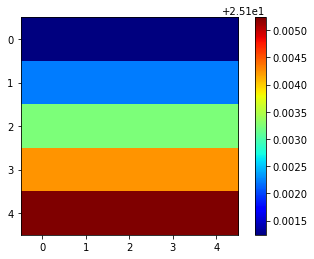

In [97]:
plt.imshow(lats, cmap=plt.get_cmap('jet'), interpolation='nearest')
#plt.imshow(lons, cmap=plt.get_cmap('jet'), interpolation='nearest')
plt.colorbar()
plt.show()

In [179]:
total_n = (2*n+1)**2
lats = np.ones(len(df)*total_n)
lons = np.ones(len(df)*total_n)
values = np.ones(len(df)*total_n)

In [180]:
for i in range(len(df)):
    lat = df.loc[i].lat
    lon = df.loc[i].lon
    latm, lonm = makeMatrix(lat, lon, n, dist=0.001, flatten=True)
    lats[i*total_n:(i+1)*total_n] = latm
    lons[i*total_n:(i+1)*total_n] = lonm
    values[i*total_n:(i+1)*total_n] = fgaussian

In [212]:
len(np.unique(lats))

49105

In [213]:
len(lats)

246000

In [252]:
gaudict = {'glat':(lats*1e4//1)*1e-4, 'glon':(lons*1e4//1)*1e-4, 'value':values}

In [253]:
gaudf = pd.DataFrame(gaudict)

In [255]:
gaudf.value

0         0.000335
1         0.006738
2         0.018316
3         0.006738
4         0.000335
            ...   
245995    0.000335
245996    0.006738
245997    0.018316
245998    0.006738
245999    0.000335
Name: value, Length: 246000, dtype: float64

In [257]:
gbygaudf = gaudf.groupby(['glat', 'glon'], as_index=False)['value'].sum()

In [111]:
import os
os.environ['PROJ_LIB'] = '/home/tsai/anaconda3/envs/RIFA/share/proj'
from mpl_toolkits.basemap import Basemap

/home/tsai/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/home/tsai/.local/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


<function matplotlib.pyplot.show(*args, **kw)>

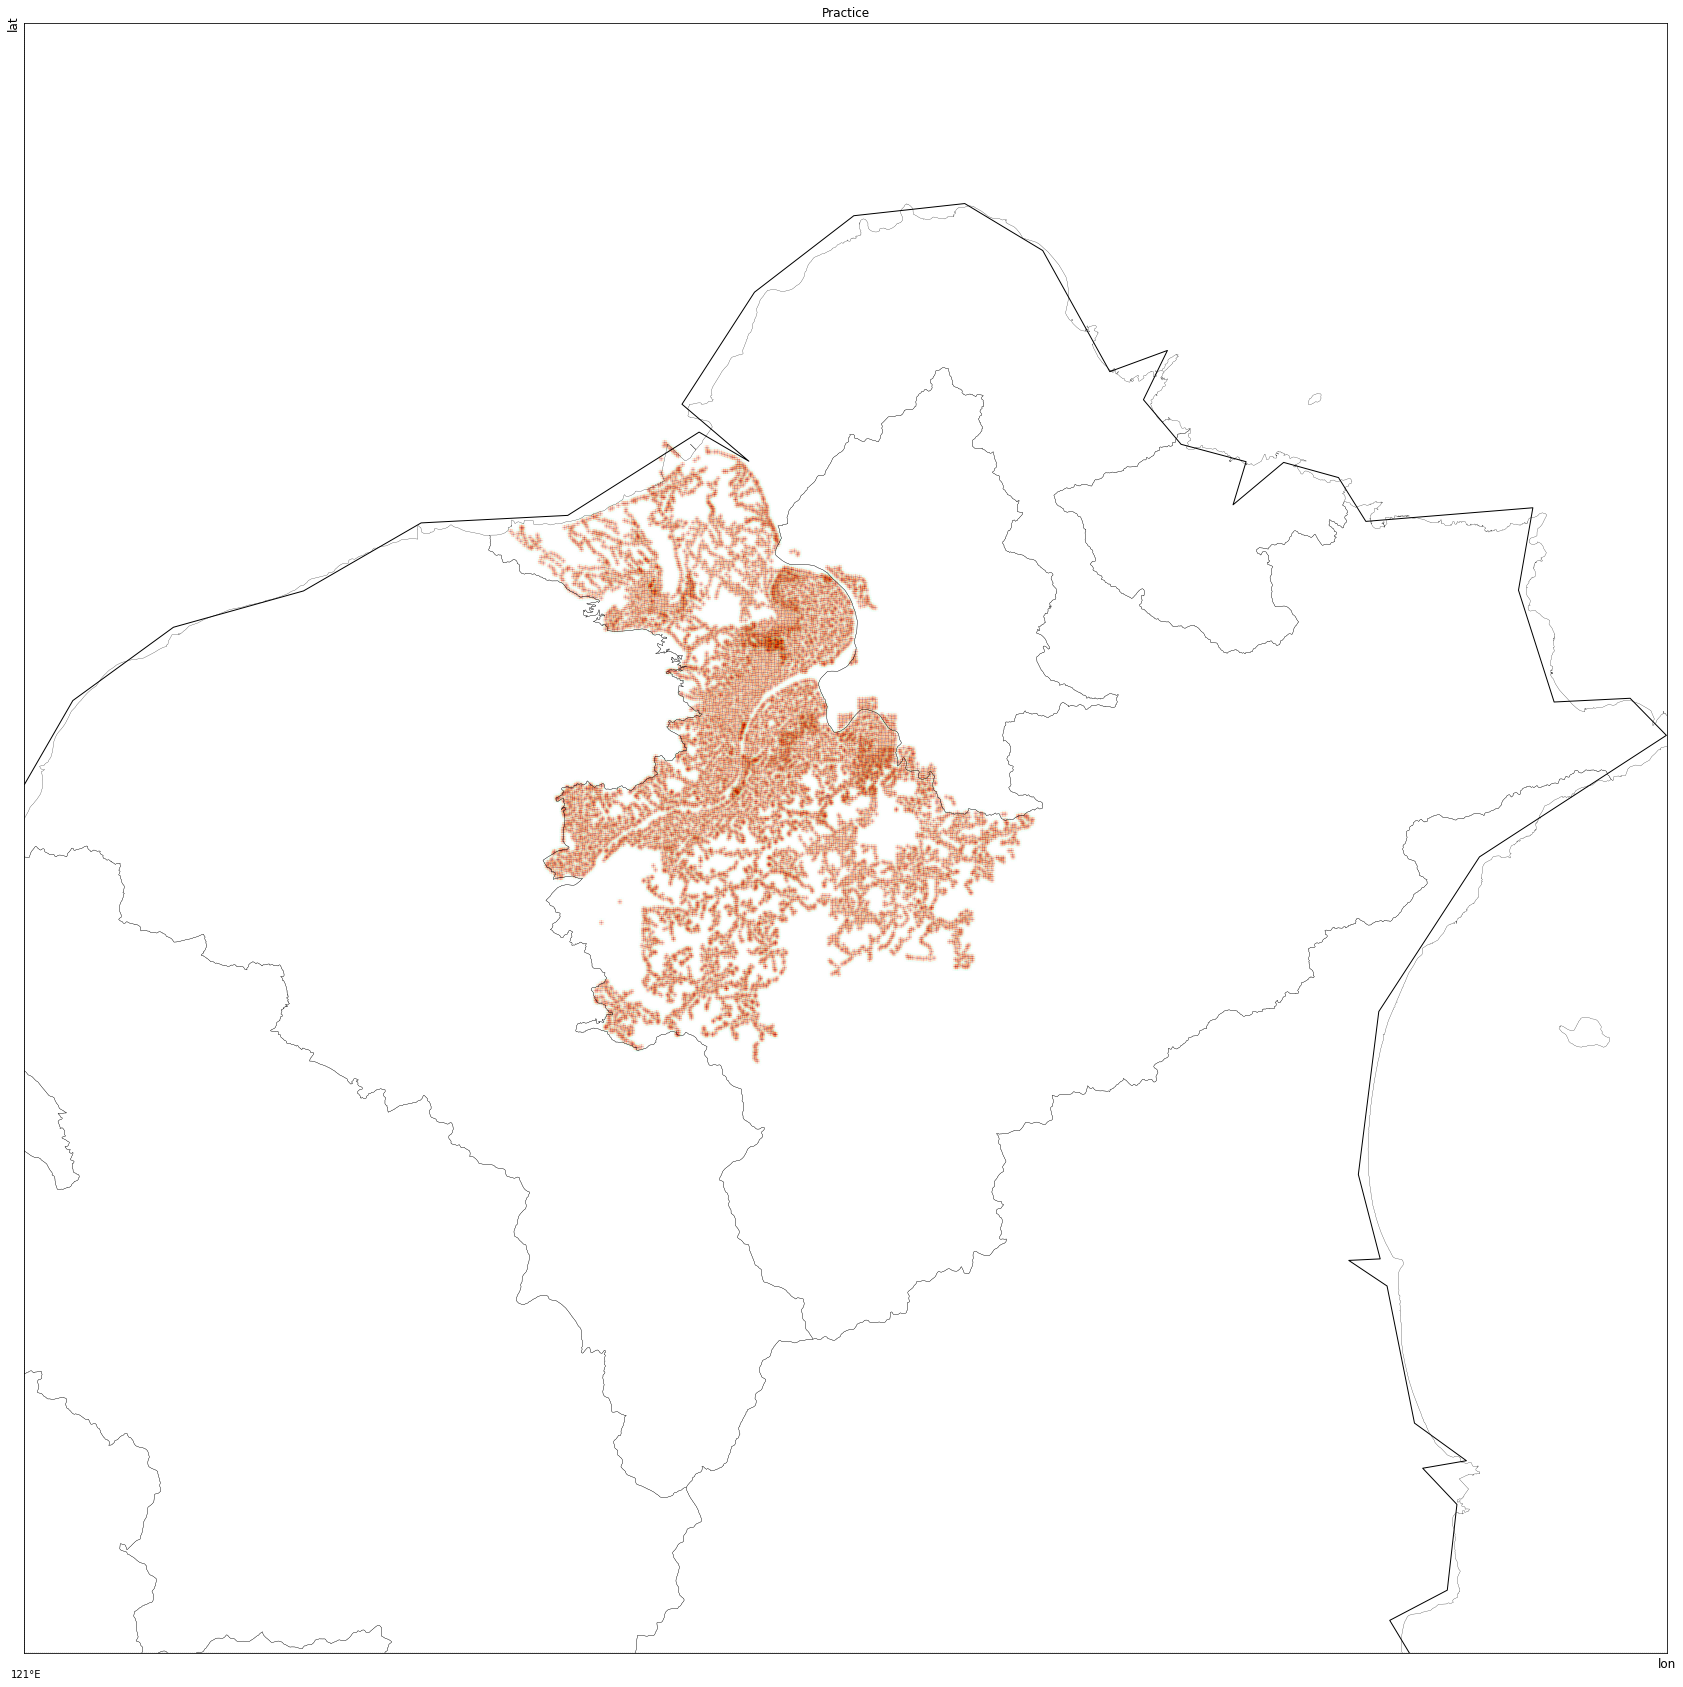

In [278]:
"""
bmap = Basemap(projection='merc', 
                              resolution='i' , fix_aspect=True,
                              llcrnrlon=119.0 , llcrnrlat=21.8,
                              urcrnrlon=122.05 , urcrnrlat=25.4,
                              lat_ts =20)
"""
plt.figure(figsize=(30, 30))
bmap = Basemap(projection='merc', 
                              resolution='i' , fix_aspect=True,
                              llcrnrlon=121.0 , llcrnrlat=24.5,
                              urcrnrlon=122.0 , urcrnrlat=25.4,
                              lat_ts =20)
bmap.readshapefile('./Data/COUNTY_MOI_1081121', name='COUNTYID' , linewidth=0.25 , drawbounds=True)
#海岸線的寬度
bmap.drawcoastlines(linewidth=1)

#儲存map , dpi=100表示存成800*600
#plt.savefig('practice_map' , dpi=100)

#畫緯度線23.5和25,labels標示出座標度數,fontsize文字大小
bmap.drawparallels(np.arange(23.5 , 25) , labels=[1,0,0,0] , fontsize=10)

#畫經度線120和122,labels標示出座標度數,fontsize文字大小
bmap.drawmeridians(np.arange(120,122),labels=[0,0,0,1],fontsize=10)

#map 底色backgroubd-color
#bmap.drawmapboundary(fill_color='#85C1E9')
#bmap.drawlsmask(land_color='coral',ocean_color='#85C1E9',lakes=True)
#取一個title
plt.title('Practice')

#設定XY說明label , xy範圍0~1(預設是中間0.5)
plt.xlabel('lon' , fontsize=12 , x=1)
plt.ylabel('lat' , fontsize=12 , y=1)
#plt.figure(figsize=(10, 20))

#lon, lat = bmap(list(df.lon), list(df.lat)) # lon, lat為給定的經緯度，可以使單個的，也可以是列表
lon, lat = bmap(list(gbygaudf.glon), list(gbygaudf.glat)) # lon, lat為給定的經緯度，可以使單個的，也可以是列表
#values_ = values[:1000]
#bmap.plot(lon, lat, 'bo')         # 標註出所在的點，s為點的大小，還可以選擇點的性狀和顏色等屬性
#lonn, latt = np.meshgrid(np.array(lon).astype(np.float16), np.array(lat).astype(np.float16))
#bmap.contourf(np.array(lon), np.array(lat), values_)



#讀取shapefile

bmap.scatter(lon, lat, c = (np.log(gbygaudf.value) - np.log(gbygaudf.value).min()+1).astype(int), s=gbygaudf.value, alpha=0.3, marker='o', cmap='jet')
plt.show


In [273]:
(np.log(gbygaudf.value)-np.log(gbygaudf.value).min()+1).astype(int).min()

1

In [276]:
(np.log(gbygaudf.value - np.log(gbygaudf.value).min()+1)).astype(int).min()

2

In [267]:
(np.log(gbygaudf.value)+9).min()

1.0

In [268]:
gbygaudf.value.min()

0.00033546262790251185

In [269]:
np.log2(gbygaudf.value).max()

1.2435956290868926

In [270]:
np.log2(gbygaudf.value).min()

-11.541560327111707

In [249]:
len(gbygaudf.values)

236684

In [248]:
(np.log(gbygaudf.values)+9).astype(int)

array([[12, 13,  1],
       [12, 13,  4],
       [12, 13,  5],
       ...,
       [12, 13,  5],
       [12, 13,  4],
       [12, 13,  1]])

In [250]:
gbygaudf.values

array([[2.48256000e+01, 1.21444200e+02, 3.35462628e-04],
       [2.48256000e+01, 1.21445200e+02, 6.73794700e-03],
       [2.48256000e+01, 1.21446200e+02, 1.83156389e-02],
       ...,
       [2.51709000e+01, 1.21389900e+02, 1.83156389e-02],
       [2.51709000e+01, 1.21390900e+02, 6.73794700e-03],
       [2.51709000e+01, 1.21391900e+02, 3.35462628e-04]])

In [145]:
bmap.urcrnry

115199.37178024836

In [146]:
bmap.urcrnrx

104489.00283453167

In [150]:
x = np.linspace(0, bmap.urcrnrx, 100000000)

In [152]:
y = np.linspace(0, bmap.urcrnrx, 10**8)

In [153]:
mlats, mlons = bmap(list(lats), list(lons))

In [ ]:
values = np.zeros(10**8, 10**8)

In [154]:
mlats

[-10020366.044643948,
 -10020366.044643948,
 -10020366.044643948,
 -10020366.044643948,
 -10020366.044643948,
 -10020261.555641115,
 -10020261.555641115,
 -10020261.555641115,
 -10020261.555641115,
 -10020261.555641115,
 -10020157.06663828,
 -10020157.06663828,
 -10020157.06663828,
 -10020157.06663828,
 -10020157.06663828,
 -10020052.577635447,
 -10020052.577635447,
 -10020052.577635447,
 -10020052.577635447,
 -10020052.577635447,
 -10019948.088632612,
 -10019948.088632612,
 -10019948.088632612,
 -10019948.088632612,
 -10019948.088632612,
 -10017889.643627014,
 -10017889.643627014,
 -10017889.643627014,
 -10017889.643627014,
 -10017889.643627014,
 -10017785.154624179,
 -10017785.154624179,
 -10017785.154624179,
 -10017785.154624179,
 -10017785.154624179,
 -10017680.665621344,
 -10017680.665621344,
 -10017680.665621344,
 -10017680.665621344,
 -10017680.665621344,
 -10017576.17661851,
 -10017576.17661851,
 -10017576.17661851,
 -10017576.17661851,
 -10017576.17661851,
 -10017471.687615676

In [155]:
?bmap